Task: Recognise whether the person on the picture is wearing a mask or not.

Group members: 
*   Adnan Nooruddin
*   Christoph Eberz
*   Ravish Kumar
*   Bennet Möller

Dataset: https://www.kaggle.com/ashishjangra27/face-mask-12k-images-dataset

Presentation: https://docs.google.com/presentation/d/1GdOwBCAr5387SQJt8mo3mMnsziqYWnMnq65V2UNkyEE/edit?usp=sharing

In [ ]:
#Connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import pickle
import pandas as pd

print("Imports done.")

Imports done.


In [ ]:
# #Downloading the Data to Google Drive (ONLY RUN ONCE)
# from google.colab import files
# files.upload() #this will prompt you to update the json

# !pip install -q kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !ls ~/.kaggle
# !chmod 600 /root/.kaggle/kaggle.json  # set permission



Saving kaggle.json to kaggle.json
kaggle.json


In [ ]:
# #Downloading the Data to Google Drive (ONLY RUN ONCE)
# #!kaggle datasets download -d EberEashishjangra27/face-mask-12k-images-dataset -p /content/gdrive/My\ Drive/Kaggle\ Datasets/face_masks
# !kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset -p /content/drive/My\ Drive

# import os
# os.chdir('/content/drive')  #change dir
# !mkdir DeepLearningData  #create a directory named data/
# !unzip -q face-mask-12k-images-dataset.zip -d DeepLearningData/  #unzip data



401 - Unauthorized


In [ ]:
#Callbacks for Early Stopping
class Callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('acc')>0.99):
        print("\n 99% acc reached")
        self.model.stop_training = True

In [ ]:
#Building the model

dropoutlayer = tf.keras.layers.Dropout(.1)
model = tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(32,(3,3),input_shape=(150, 150, 3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
    
     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
    
     tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
    
     tf.keras.layers.Flatten(),
     dropoutlayer,
     tf.keras.layers.Dense(512, activation='relu'),
     dropoutlayer,
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')
    
 ])

adam = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])
print('Model compiled.')

Model compiled.


In [ ]:
TRAINING_DIR = '/content/drive/MyDrive/DeepLearningData/Face Mask Dataset/Train'

train_datagen = ImageDataGenerator(
     rescale=1/255,
#     rotation_range=40,
#     width_shift_range=.2,
#     height_shift_range=.2,
#     shear_range=.2,
#     zoom_range=.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
)

train_generator =train_datagen.flow_from_directory(
     TRAINING_DIR,
     batch_size=64,
     class_mode='binary',
     target_size=(dim,dim),
    #  save_to_dir='/content/drive/MyDrive/Test'
)

VALIDATION_DIR = '/content/drive/MyDrive/DeepLearningData/Face Mask Dataset/Validation'
validation_datagen = ImageDataGenerator(
     rescale=1/255,
 )

validation_generator =validation_datagen.flow_from_directory(
     VALIDATION_DIR,
     batch_size=64,
     class_mode='binary',
     target_size=(dim,dim)
)

#get_callbacks = tf.keras.callbacks.EarlyStopping(
#    monitor='loss', min_delta=0.001, patience=3, verbose=0,
#    mode='auto', baseline=None, restore_best_weights=False
#)


history = model.fit_generator(train_generator,
                               epochs=20,
                               verbose=1,
                               validation_data=validation_generator,
                               callbacks=Callbacks()
                              )

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
157/157 [==============================] - 36s 180ms/step - loss: 0.4087 - acc: 0.8483 - val_loss: 0.0500 - val_acc: 0.9850
Epoch 2/20
157/157 [==============================] - 28s 176ms/step - loss: 0.0617 - acc: 0.9761 - val_loss: 0.0275 - val_acc: 0.9925
Epoch 3/20
157/157 [==============================] - 27s 173ms/step - loss: 0.0330 - acc: 0.9882 - val_loss: 0.0250 - val_acc: 0.9925
Epoch 4/20
157/157 [==============================] - 31s 195ms/step - loss: 0.0243 - acc: 0.9909 - val_loss: 0.0147 - val_acc: 0.9962

 99% acc reached


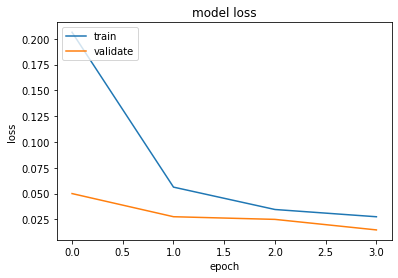

In [ ]:
#Visualize loss function
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

#Export History to CSV
#Adjust filename to prevent from overwriting old histories
hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/Colab Notebooks/history.csv'
with open(hist_csv_file, mode='w') as f:
  hist_df.to_csv(f)


In [ ]:
#Prepare the Data for testing
TEST_DIR = '/content/drive/MyDrive/DeepLearningData/Face Mask Dataset/Test'
test_datagen = ImageDataGenerator(
     rescale=1/255
 )

test_generator =test_datagen.flow_from_directory(
     TEST_DIR,
     batch_size=64,
     class_mode='binary',
     target_size=(dim,dim)
)


history = model.predict(test_generator)

Found 992 images belonging to 2 classes.


In [ ]:
#Test the model
model.evaluate(test_generator)

16/16 [==============================] - 2s 145ms/step - loss: 0.0296 - acc: 0.9929


[0.029595281928777695, 0.992943525314331]